# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load two `pandas` `DataFrame` objects, one called `shampoo` and one called `housing`, which contains the data used in Makridakis Chapter 3. 

In [1]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16



!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')



!pip install -U statsmodels

from statsmodels.nonparametric.smoothers_lowess import lowess

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   4578      0 --:--:-- --:--:-- --:--:--  4578
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   4875      0 --:--:-- --:--:-- --:--:--  4875
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  37182      0 --:--:-- --:--:-- --:--:-- 37182
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   4606      0 --:--:-- --:--:-- --:--:--  4606
  % Total    % Received % Xferd  Average Speed   Tim

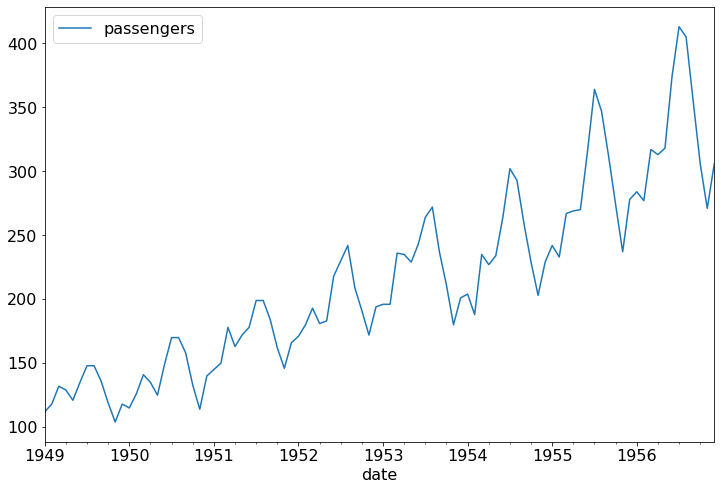

In [3]:
airline_series.plot()

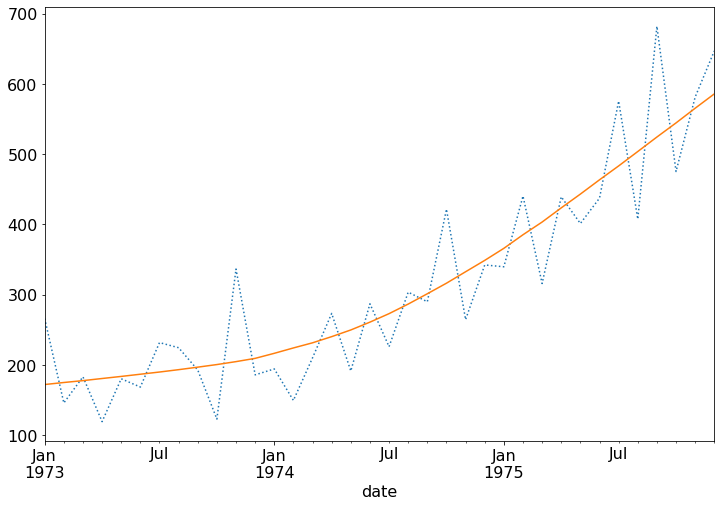

In [22]:
smoothed = lowess(shampoo['total_sales'], shampoo.index, return_sorted=False)

shampoo['loess_smoothed'] = smoothed

shampoo['total_sales'].plot(linestyle='dotted')
shampoo['loess_smoothed'].plot()

In [23]:
lowess??

In [16]:
housing.shape

(275, 1)